# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Easily-creating-MAB-problems" data-toc-modified-id="Easily-creating-MAB-problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Easily creating MAB problems</a></div><div class="lev2 toc-item"><a href="#Bernoulli-arms" data-toc-modified-id="Bernoulli-arms-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bernoulli arms</a></div><div class="lev2 toc-item"><a href="#Gaussian-arms" data-toc-modified-id="Gaussian-arms-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian arms</a></div><div class="lev2 toc-item"><a href="#Exponential-arms" data-toc-modified-id="Exponential-arms-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exponential arms</a></div><div class="lev2 toc-item"><a href="#Uniform-arms" data-toc-modified-id="Uniform-arms-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Uniform arms</a></div>

---
# Easily creating MAB problems
First, be sure to be in the main folder, and import `MAB` from `Environment` package:

In [1]:
from sys import path
path.insert(0, '..')

In [2]:
from Environment import MAB

 - Setting dpi of all figures to 110 ...
 - Setting 'figsize' of all figures to (19.8, 10.8) ...


And also, import all the types of arms.

In [3]:
from Arms import *
# Check it exists:
Bernoulli, Gaussian, Exponential, ExponentialFromMean, Poisson, Uniform

Info: numba.jit seems to be available.


(Arms.Bernoulli.Bernoulli,
 Arms.Gaussian.Gaussian,
 Arms.Exponential.Exponential,
 Arms.Exponential.ExponentialFromMean,
 Arms.Poisson.Poisson,
 Arms.Uniform.Uniform)

## Bernoulli arms
Then it's easy to create a Multi-Armed Bandit problem, instance of `MAB` class, either from a list of `Arm` objects:

In [4]:
M_B = MAB([Bernoulli(mu) for mu in [0.1, 0.5, 0.9]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [B(0.1), B(0.5), B(0.9)] ...
 - with 'arms' = [B(0.1), B(0.5), B(0.9)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.24 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


Or from a dictionary, with keys `"arm_type"` and `"params"`:

In [5]:
M_B = MAB({
    "arm_type": Bernoulli,
    "params": [0.1, 0.5, 0.9]
})

Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.5, 0.9]} ...
 - with 'arm_type' = <class 'Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.5, 0.9]
 - with 'arms' = [B(0.1), B(0.5), B(0.9)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.24 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


The `plotHistogram()` method draws a lot of samples from each arm, and plot a histogram of their repartition:

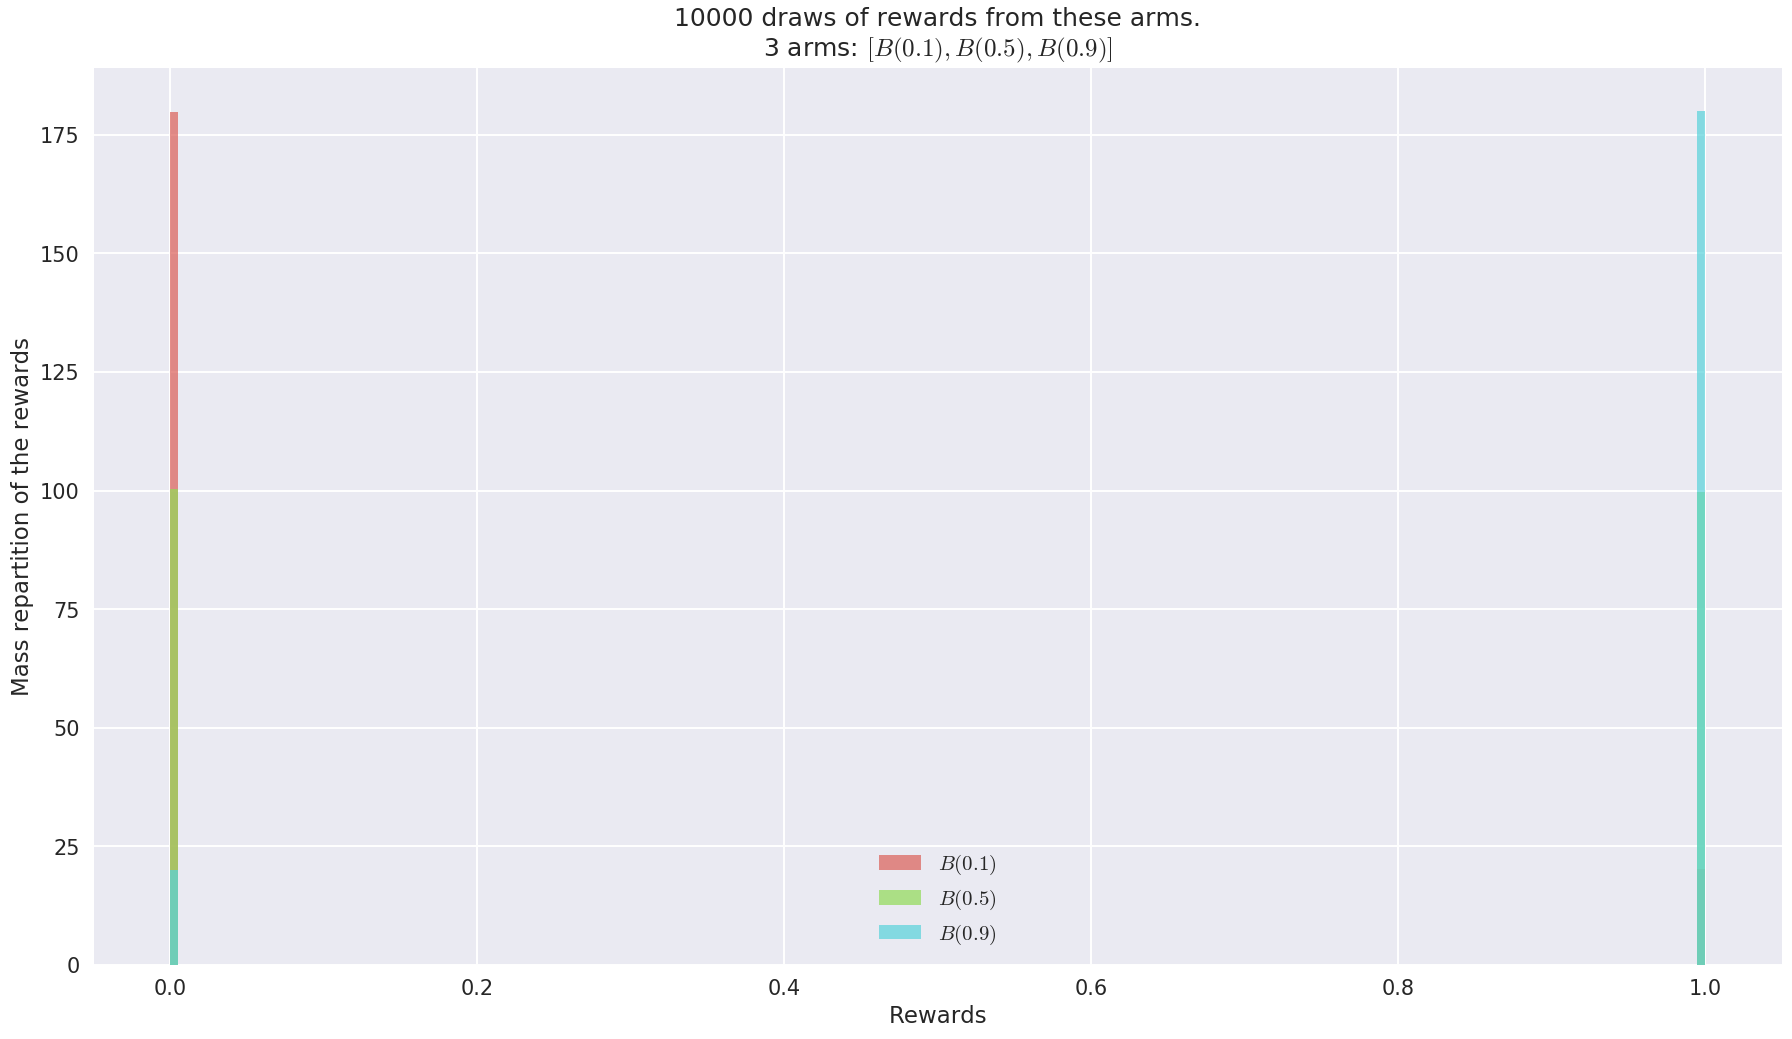

In [6]:
M_B.plotHistogram()

## Gaussian arms
And with Gaussian arms, with a small variance of $\sigma^2 = 0.05$, for rewards truncated into $[0, 1]$:

In [7]:
M_G = MAB([Gaussian(mu, sigma=0.05) for mu in [0.1, 0.5, 0.9]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.1, 0.05), G(0.5, 0.05), G(0.9, 0.05)] ...
 - with 'arms' = [G(0.1, 0.05), G(0.5, 0.05), G(0.9, 0.05)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.375 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


The histogram clearly shows that low-variance Gaussian arms are easy to separate:

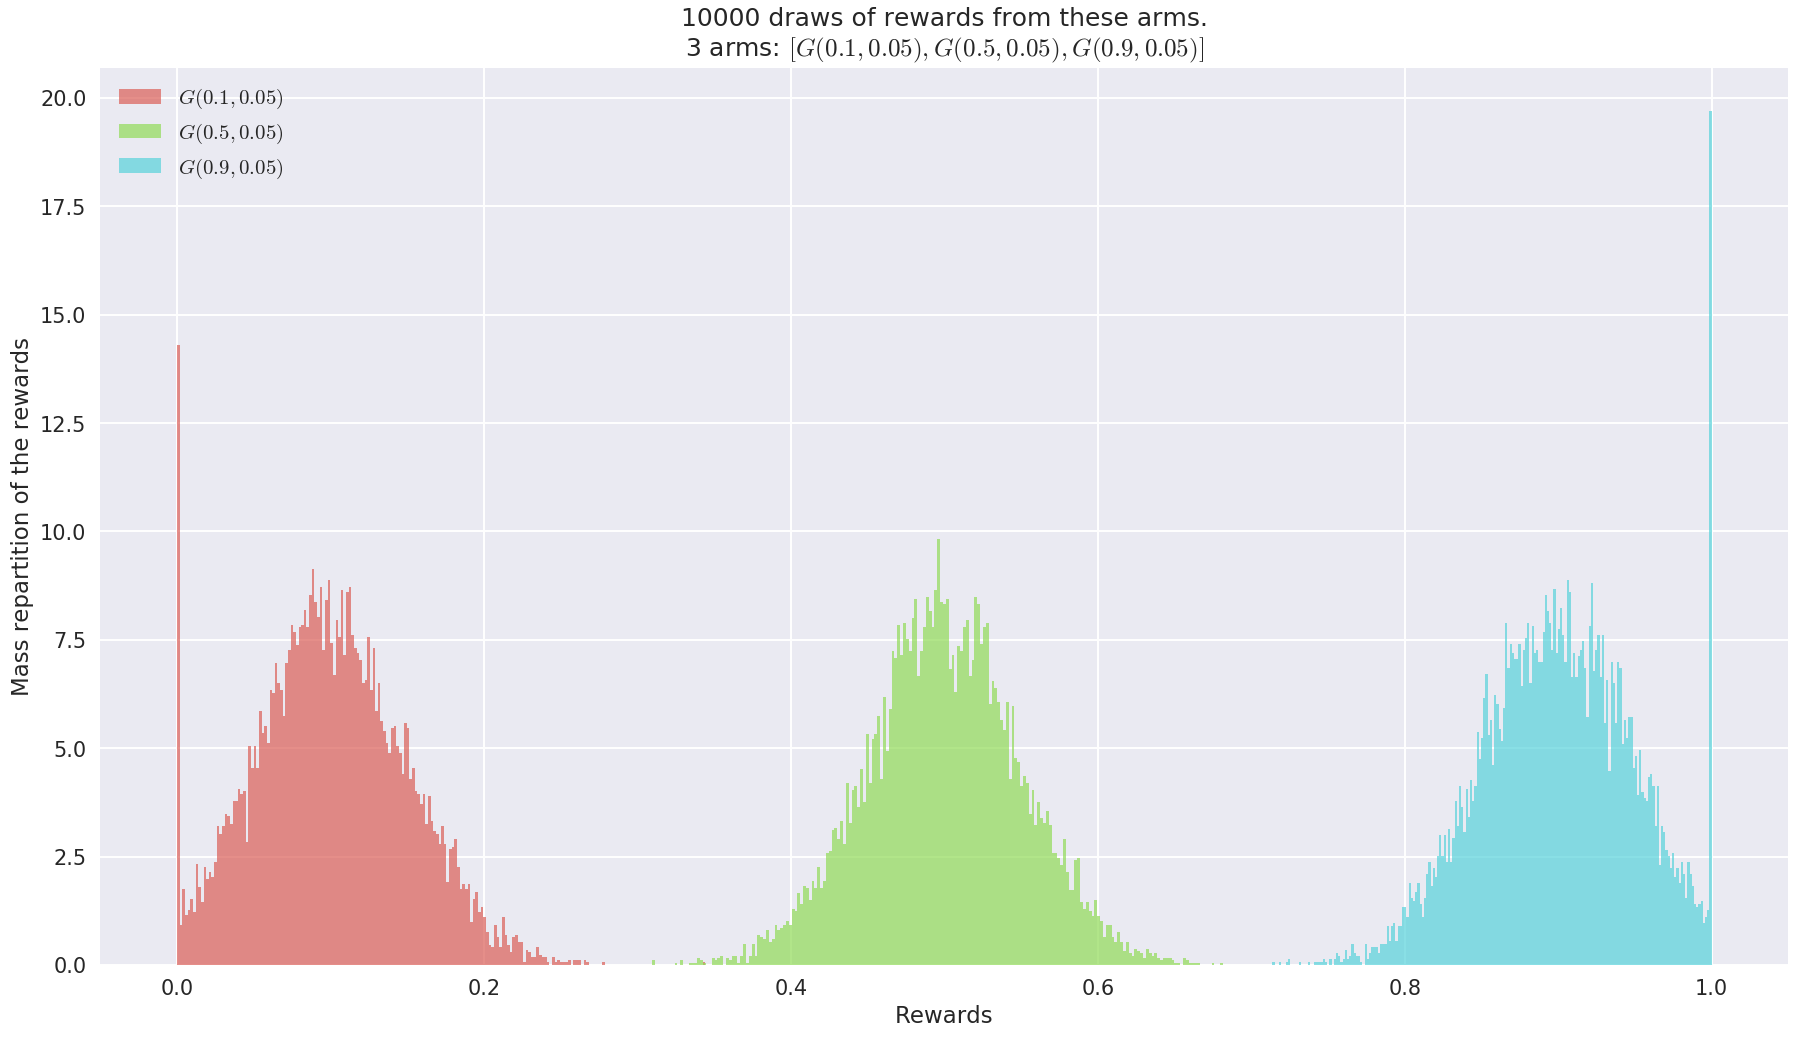

In [8]:
M_G.plotHistogram()

But if the variance is larger, it can be very hard to differentiate between arms, and so MAB learning will be harder.
With a big variance of $\sigma^2 = 0.5$, for rewards truncated into $[0, 1]$:

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.1, 0.1), G(0.5, 0.1), G(0.9, 0.1)] ...
 - with 'arms' = [G(0.1, 0.1), G(0.5, 0.1), G(0.9, 0.1)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.75 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


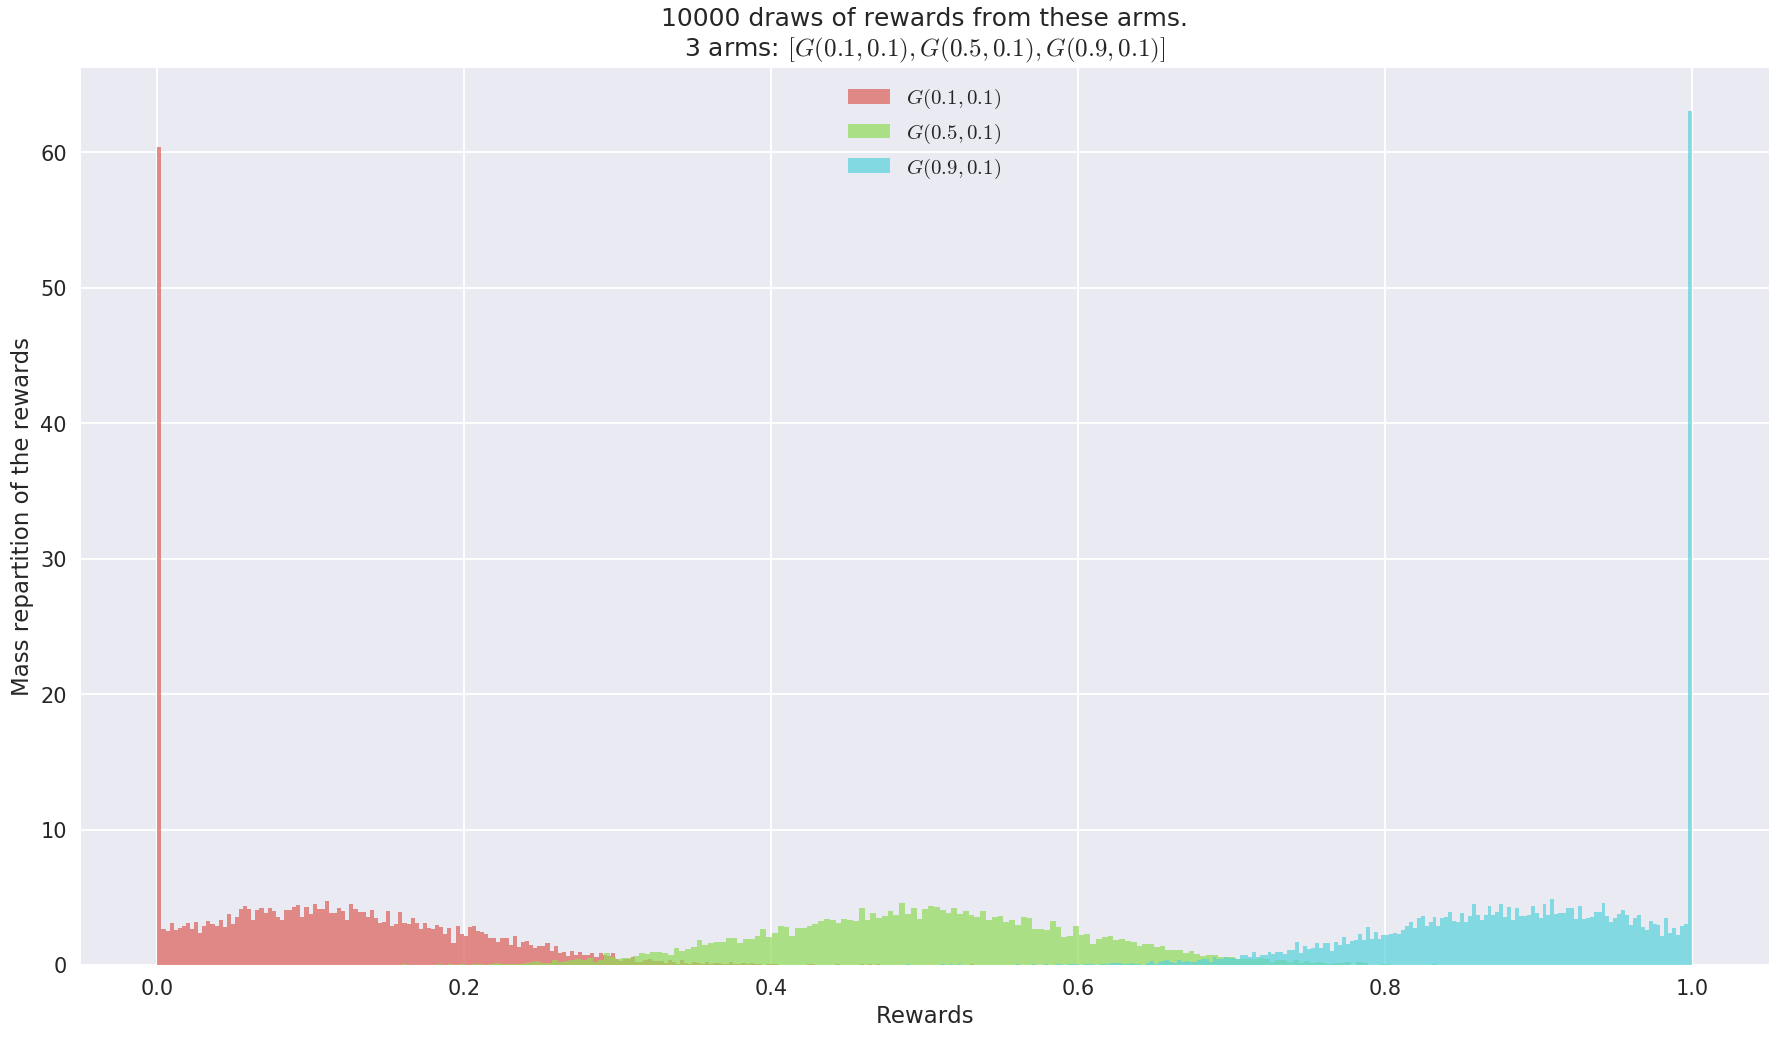

In [9]:
M_G = MAB([Gaussian(mu, sigma=0.10) for mu in [0.1, 0.5, 0.9]])
M_G.plotHistogram()

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.1, 0.25), G(0.5, 0.25), G(0.9, 0.25)] ...
 - with 'arms' = [G(0.1, 0.25), G(0.5, 0.25), G(0.9, 0.25)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.87 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


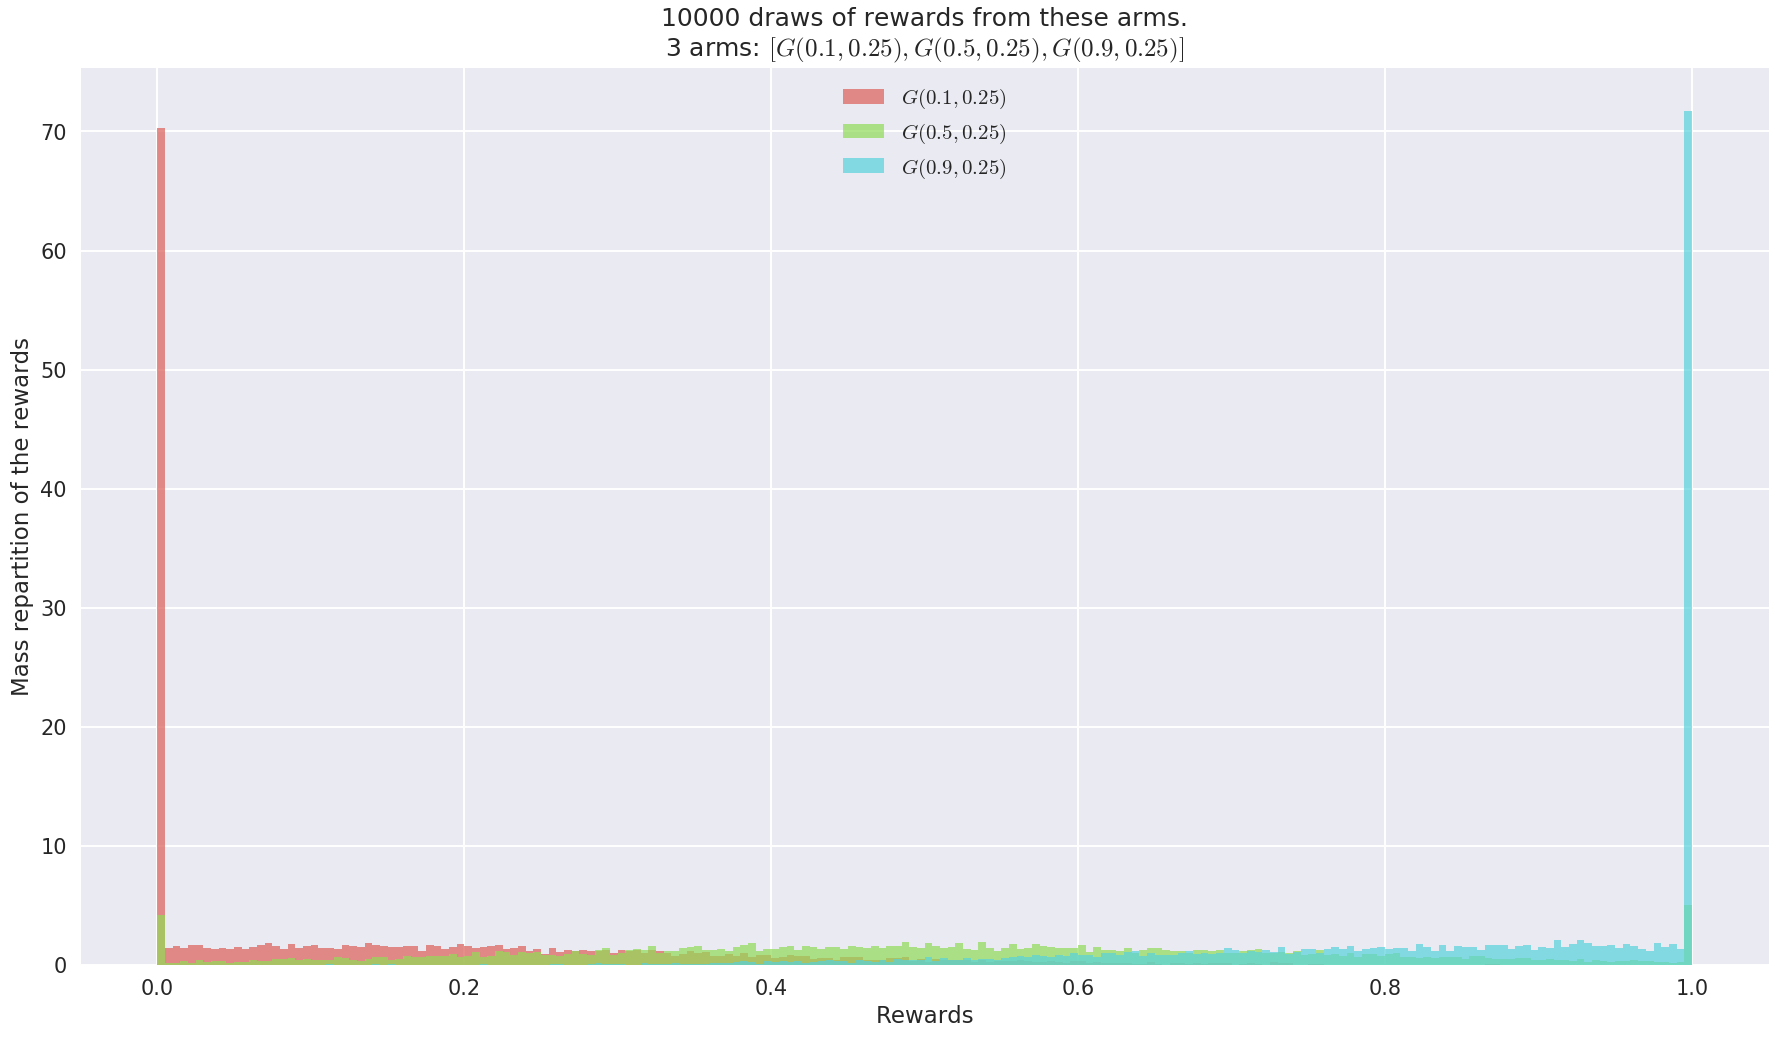

In [10]:
M_G = MAB([Gaussian(mu, sigma=0.25) for mu in [0.1, 0.5, 0.9]])
M_G.plotHistogram()

## Exponential arms
We can do the same with (truncated) Exponential arms, and as a convenience I prefer to work with `ExponentialFromMean`, to use the mean and not the $\lambda$ parameter to create the arm.

In [11]:
M_E = MAB({ "arm_type": ExponentialFromMean, "params": [0.1, 0.5, 0.9]})

Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'Arms.Exponential.ExponentialFromMean'>, 'params': [0.1, 0.5, 0.9]} ...
 - with 'arm_type' = <class 'Arms.Exponential.ExponentialFromMean'>
 - with 'params' = [0.1, 0.5, 0.9]
 - with 'arms' = [Exp(10, 1), Exp(1.59, 1), Exp(0.215, 1)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.900000003233
 - with 'minArm' = 0.100000000055

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.4 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


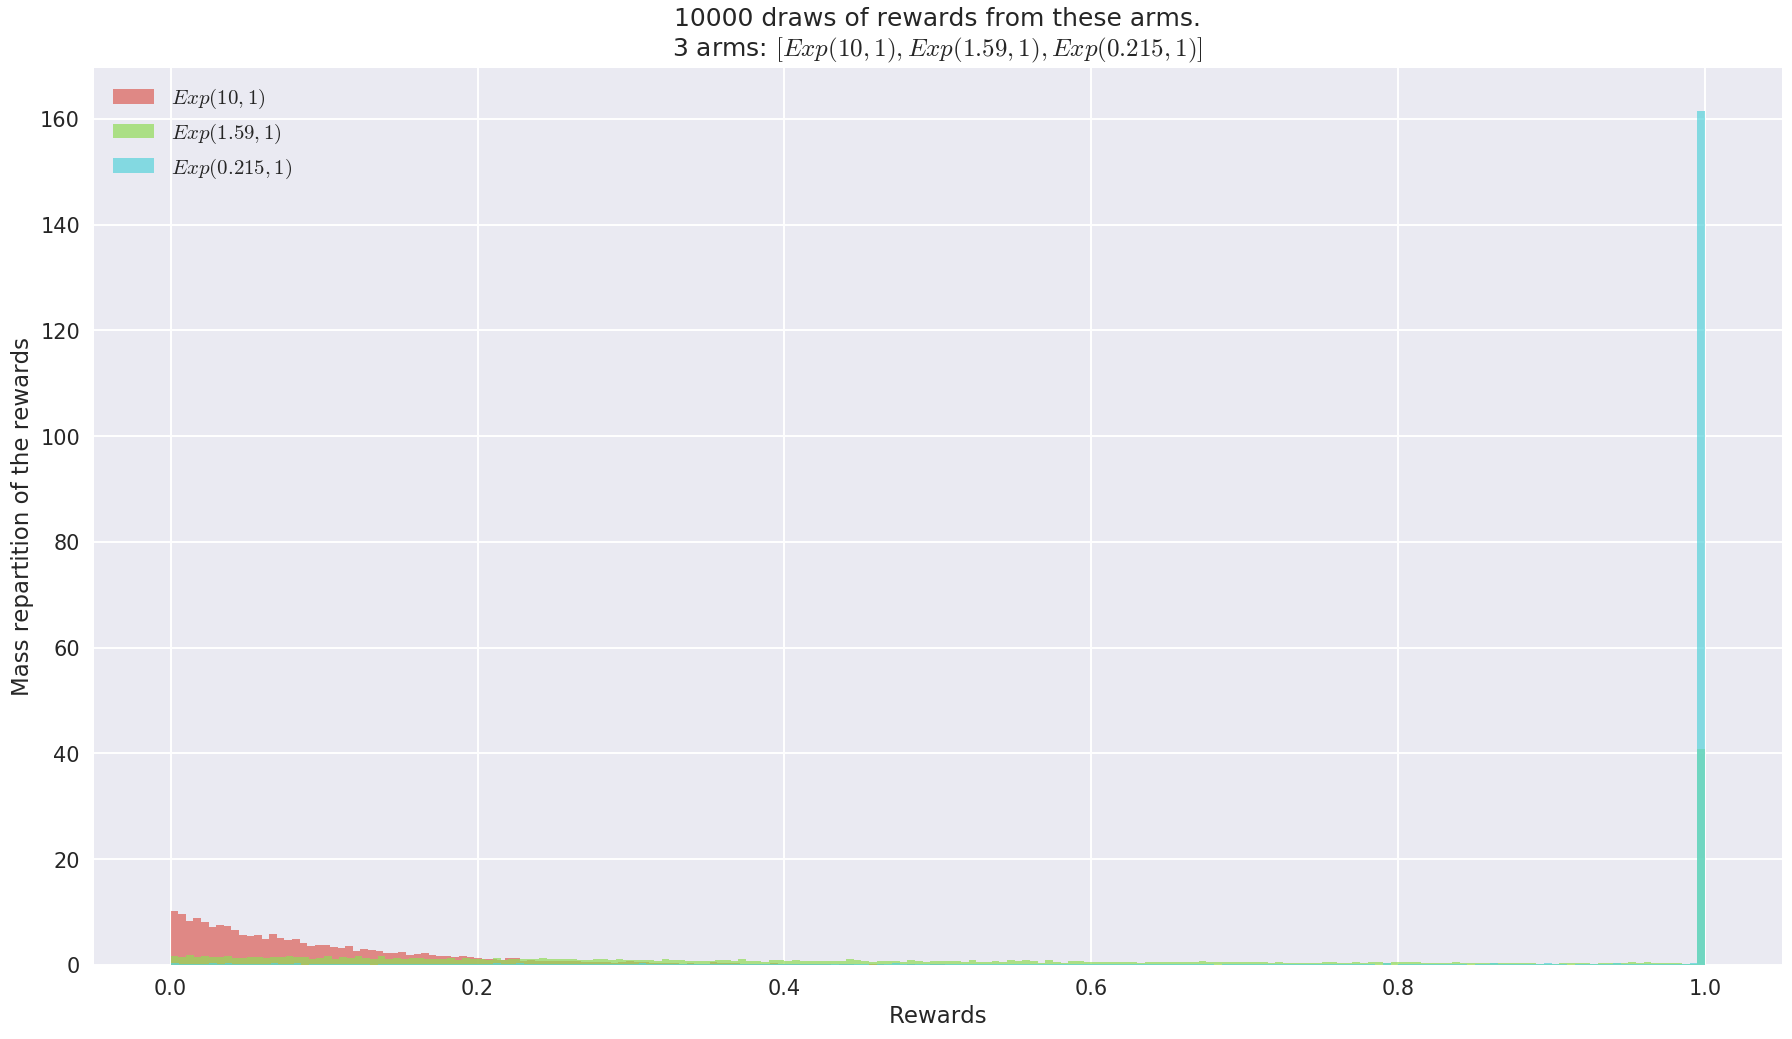

In [12]:
M_E.plotHistogram()

## Uniform arms
Arms with rewards uniform in $[0,1]$, are continuous versions of Bernoulli$(0.5)$.
They can also be uniform in other intervals.

In [13]:
Uniform(0, 1).lower_amplitude
Uniform(0, 0.1).lower_amplitude
Uniform(0.4, 0.5).lower_amplitude
Uniform(0.8, 0.9).lower_amplitude

(0, 1)

(0, 0.1)

(0.4, 0.09999999999999998)

(0.8, 0.09999999999999998)

In [14]:
M_U = MAB([Uniform(0, 1), Uniform(0, 0.1), Uniform(0.4, 0.5), Uniform(0.8, 0.9)])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [U(0, 1), U(0, 0.1), U(0.4, 0.1), U(0.8, 0.1)] ...
 - with 'arms' = [U(0, 1), U(0, 0.1), U(0.4, 0.1), U(0.8, 0.1)]
 - with 'nbArms' = 4
 - with 'maxArm' = 0.85
 - with 'minArm' = 0.05

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 2.47 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.25% ...


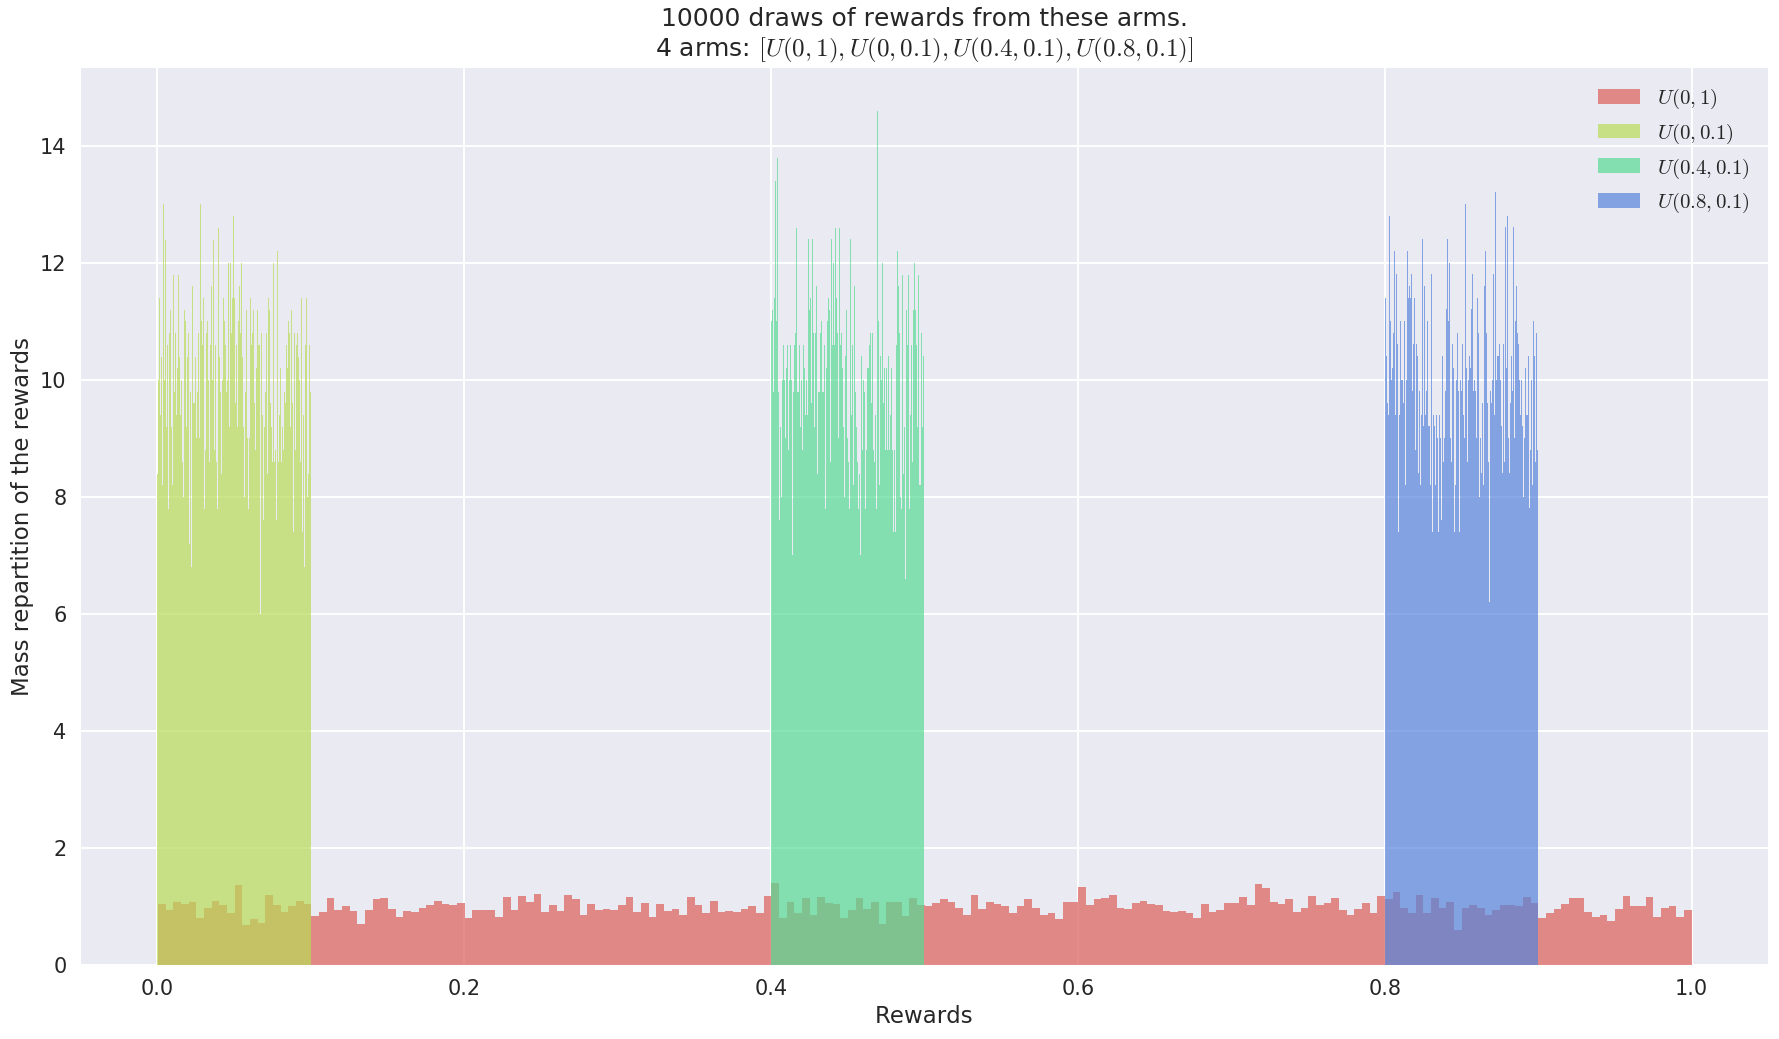

In [15]:
M_U.plotHistogram()